# SPS analyses

In this notebook, we analyse the SPS computed with the notebook SPS_computation.ipynb. We only look at the SPS computed with a perfect model approach, i.e., the reference is taken inside the same ensemble (same experiment). It corresponds to the variable SPSintra of the SPS files.

Some functions used here come from the homemade Python packages: libiceedge.py and libfig.py. So, make sure to install Python_library library and that Python is able to locate it: put **export PYTHONPATH=<path_to_Python_library\>:${PYTHONPATH}** in your .bashrc, .profile or equivalent.

In [1]:
#Importation of the different libraries

##Loading of the NetCDF files
import xarray as xr

##Computing
import numpy as np
import libiceedge

##Graphical display
import libfig
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from cmocean import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Name: libiceedge
Package: 
This is a collection of functions to look at the sea ice edge.
Name: libdiv
Package: 
This is a collection of diverse functions.
Name: libfig
Package: 
This is a collection of diverse functions for creating figures.


### Loading the data

In [2]:
#Definition of some useful variables to localise the data

path_store_commun="/lustre/fsstor/projects/rech/cli/commun/"
diri_results_ArcticBLISS="Arctic-BLISS_LF/"
diri_SPS="SPS/"

In [7]:
#Definition of experiments and periods of interest

period_interest=["19970116_19970125","19970126_19970204","19970205_19970214","19970215_19970224",\
                "19970225_19970306","19970307_19970316","19970317_19970326","19970327_19970405"]
exp_interest=["EBLKBBM001","EBLKBBM010","EBLKBBM050","EBLKEVP001","EBLKEVP010","EBLKEVP050"]
exp_interest_ref=["EABLBBM001","EABLBBM010","EABLBBM050","EABLEVP001","EABLEVP010","EABLEVP050"]
nb_mber=20 #number of members
print(period_interest,exp_interest,exp_interest_ref,nb_mber)

['19970116_19970125', '19970126_19970204', '19970205_19970214', '19970215_19970224', '19970225_19970306', '19970307_19970316', '19970317_19970326', '19970327_19970405'] ['EBLKBBM001', 'EBLKBBM010', 'EBLKBBM050', 'EBLKEVP001', 'EBLKEVP010', 'EBLKEVP050'] ['EABLBBM001', 'EABLBBM010', 'EABLBBM050', 'EABLEVP001', 'EABLEVP010', 'EABLEVP050'] 20


#### Loading SPS data

In [9]:
#Loading the NetCDF files containing the SPS (zoom 0 = over the whole Arctic)

dat_sps_zoom0=[[] for _ in range(len(period_interest))] #list that will contain the SPS of the different experiments for zoom0

for iperiod in range(len(period_interest)): #iteration over the periods of interest
    for iexp in range(len(exp_interest)): #iteration over the experiments of interest
        
        ##over the whole Arctic
        path_zoom0=path_store_commun+diri_results_ArcticBLISS+exp_interest[iexp]+"/"+period_interest[iperiod]+"/"+diri_SPS+"SPS_"+exp_interest[iexp]+"compto"+exp_interest_ref[iexp]+"_zoom0_"+period_interest[iperiod]+".nc"
        print(path_zoom0)
        dat_sps_zoom0[iperiod].append(xr.open_mfdataset(path_zoom0,decode_times=True))
        
print(len(dat_sps_zoom0))

/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM001/19970116_19970125/SPS/SPS_EBLKBBM001comptoEABLBBM001_zoom0_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM010/19970116_19970125/SPS/SPS_EBLKBBM010comptoEABLBBM010_zoom0_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM050/19970116_19970125/SPS/SPS_EBLKBBM050comptoEABLBBM050_zoom0_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKEVP001/19970116_19970125/SPS/SPS_EBLKEVP001comptoEABLEVP001_zoom0_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKEVP010/19970116_19970125/SPS/SPS_EBLKEVP010comptoEABLEVP010_zoom0_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKEVP050/19970116_19970125/SPS/SPS_EBLKEVP050comptoEABLEVP050_zoom0_19970116_19970125.nc
/lustre/fsstor/projects/rech/cli/commun/Arctic-BLISS_LF/EBLKBBM001/19970126_19970204/SPS/SPS_EBLKBBM001comptoEABLBBM00

In [10]:
#Saving some useful variables for the following

##Size of the time dimension
size_time=dat_sps_zoom0[0][0].sizes["time"]
print("size time",size_time)

##Time vector
time=[dat_sps_zoom0[iperiod][0].time.values for iperiod in range(len(period_interest))]
print(len(time),len(time[0]))

##Time vector (in days since the beginning)
tdays=(time[0]-time[0][0])/np.timedelta64(1,'D')
print(len(tdays),tdays[:25],tdays[-25:])

size time 240
8 240
240 [0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ] [8.95833333 9.         9.04166667 9.08333333 9.125      9.16666667
 9.20833333 9.25       9.29166667 9.33333333 9.375      9.41666667
 9.45833333 9.5        9.54166667 9.58333333 9.625      9.66666667
 9.70833333 9.75       9.79166667 9.83333333 9.875      9.91666667
 9.95833333]


#### Loading NEMO outputs

In [11]:
#Loading the NetCDF files containing sea ice variables: one experiment but all the periods

fq_outputs="1h" #hourly outputs

    ##Choose the experiment that interests us
iexp=3 ; print(exp_interest[iexp]) ; exp_interest_solo=exp_interest[iexp]

##Loading the data
dat_exp_interest=[] #list that will contain the different members

for k in range(1,nb_mber+1):#iteration over the members
    path="/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4_ICE_ABL-"+exp_interest[iexp]+"-S/*/"+str(k).zfill(3)+"*"+fq_outputs+"*icemod.nc4"
    dat_exp_interest.append(xr.open_mfdataset(path,decode_times=True))
    print(dat_exp_interest[-1].name,dat_exp_interest[-1].sizes["time_counter"])
    print(dat_exp_interest[-1].time_counter[0].values, dat_exp_interest[-1].time_counter[-1].values)

print(len(dat_exp_interest))

EBLKEVP001
/lustre/fsn1/projects/rech/cli/regi915/NEMO//NANUK4/NANUK4_ICE_ABL-EBLKEVP001-S/00001801-00003000/001NANUK4_ICE_ABL-EBLKEVP001_1h_19970116_19970125_icemod 1920
1997-01-16T00:30:00.000000000 1997-04-05T23:30:00.000000000
/lustre/fsn1/projects/rech/cli/regi915/NEMO//NANUK4/NANUK4_ICE_ABL-EBLKEVP001-S/00001801-00003000/002NANUK4_ICE_ABL-EBLKEVP001_1h_19970116_19970125_icemod 1920
1997-01-16T00:30:00.000000000 1997-04-05T23:30:00.000000000
/lustre/fsn1/projects/rech/cli/regi915/NEMO//NANUK4/NANUK4_ICE_ABL-EBLKEVP001-S/00001801-00003000/003NANUK4_ICE_ABL-EBLKEVP001_1h_19970116_19970125_icemod 1920
1997-01-16T00:30:00.000000000 1997-04-05T23:30:00.000000000
/lustre/fsn1/projects/rech/cli/regi915/NEMO//NANUK4/NANUK4_ICE_ABL-EBLKEVP001-S/00001801-00003000/004NANUK4_ICE_ABL-EBLKEVP001_1h_19970116_19970125_icemod 1920
1997-01-16T00:30:00.000000000 1997-04-05T23:30:00.000000000
/lustre/fsn1/projects/rech/cli/regi915/NEMO//NANUK4/NANUK4_ICE_ABL-EBLKEVP001-S/00001801-00003000/005NANUK4_I

### Time series of the SPS

SPSintra member_ref_intra


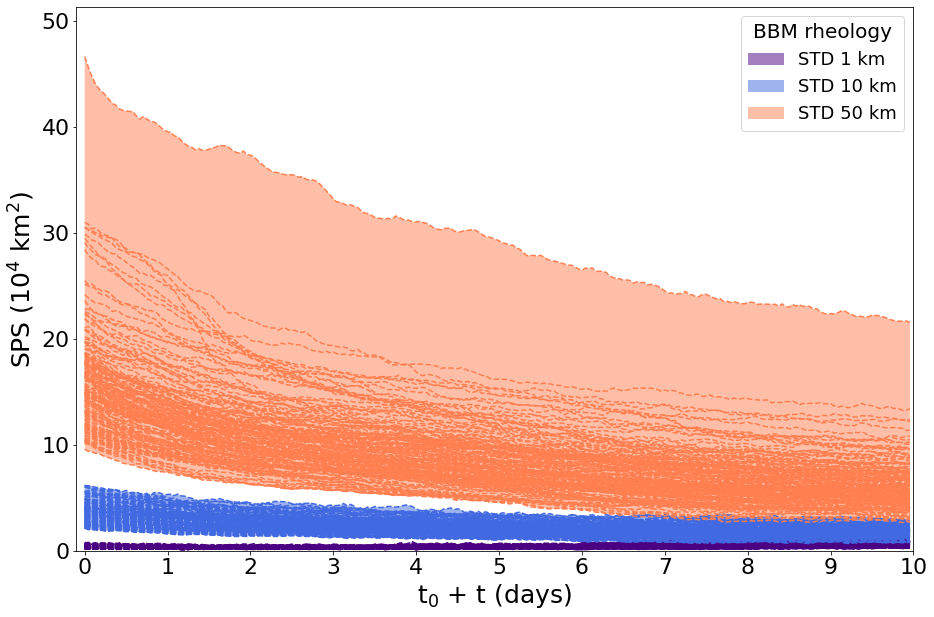

In [13]:
#Time series of the SPS: all members of all periods

##Choose the experiments to plot

atmos_select="BLK" ; rheo_select="BBM"
exp_plot=[iexp for iexp in range(len(exp_interest)) if atmos_select+rheo_select in exp_interest[iexp]]

##Creation of the figure
fig,ax=plt.subplots(figsize=(15,10))
label_fig=atmos_select+"+"+rheo_select

##Definition of some useful variables
loc_legend="upper right"
    ##The variable of interest
type_ref="intra" #the reference is taken inside the same ensemble (same experiment)
var="SPS"+type_ref
print(var,"member_ref_"+type_ref)
    ##Coefficient to convert m2 into 10^4 km2
coef=10**(-4)*10**(-6)

##Plot the SPS

for iexp in exp_plot:#iteration over the experiments of interest

    ##Color and label associated with the experiment
    color,label=libfig.fgraph_attributesv2(exp_interest[iexp],"rheo",type_label="IC",focus_model="rheo")#the color, marker and label depend on the initial perturbation and/or the kind of model

    ##Some previous computations: min and max over all periods and members
    data_min=np.min([dat_sps_zoom0[iperiod][iexp][var].min("member_ref_"+type_ref) for iperiod in range(len(period_interest))],axis=0)
    data_max=np.max([dat_sps_zoom0[iperiod][iexp][var].max("member_ref_"+type_ref) for iperiod in range(len(period_interest))],axis=0)

    ##Plot of the SPS
    ax.fill_between(tdays,data_min*coef,data_max*coef,label=label[3:],facecolor=color,alpha=0.5)#envelope
        ##plot of the members individually
    for iperiod in range(len(period_interest)): #iteration over the periods of interest
        for imb in dat_sps_zoom0[iperiod][iexp]["member_ref_"+type_ref]: #iteration over the members
            ax.plot(tdays,dat_sps_zoom0[iperiod][iexp][var][imb,:]*coef,c=color,lw=1.5,ls="--")

##Display the legend
ax.legend(loc=loc_legend,fontsize=18,title="a"*(rheo_select=="EVP")+rheo_select+" rheology",title_fontsize=20)

##Set up the axes
ax.tick_params(axis="both",labelsize=22)
ax.set_ylabel("SPS ("+r"$\mathrm{10^4 \ km^2}$"+")",fontsize=25)
ax.set_xlabel(r"$\mathrm{t_0}$"+" + t (days)",fontsize=25)
ax.set_xticks(np.append(tdays[::24],10))
ax.set_xlim(-0.1,10)
ax.set_ylim(0,1.1*np.max(data_max)*coef)

plt.show()

##Saving the figure (change the path if needed)
#fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_SPS_newexp/SPSintra_Arctic_"+label_fig+".png",\
#            facecolor="white",edgecolor="none",bbox_inches="tight")

### Some illustrative plots

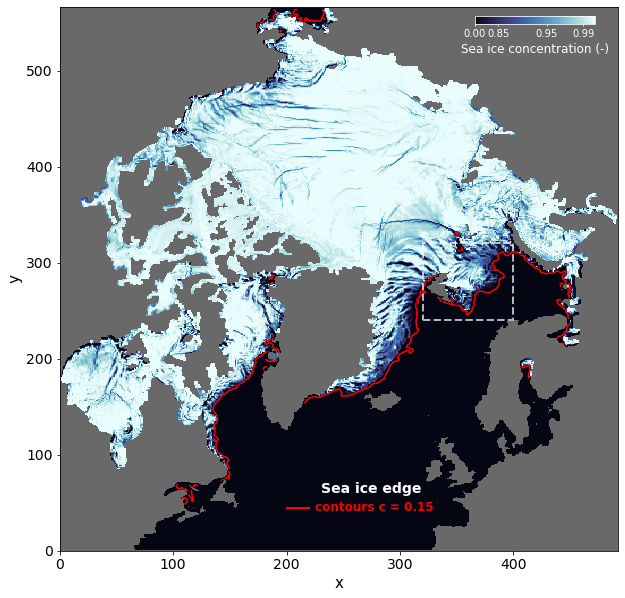

In [14]:
#Definition of some parameters for the region which interests us here

##position of the lower corner of the window of display
pos_corner=(320,240)
##width and height of the region of interest
width_height=(80,80)

#Quick visualisation of the region of interest

dat_masks=xr.open_dataset("/lustre/fsstor/projects/rech/cli/commun/NANUK4/NANUK4.L31-I/mesh_mask_NANUK4_L31_4.2_1stLev.nc")#configuration masks

##Creation of the figure
fig,ax=plt.subplots(1,1,figsize=(10,10))

##Plot the sea ice edge of a given member
plt.contour(dat_exp_interest[0].siconc[0,:,:].where(dat_masks.tmask[0,0,:,:]>0),levels=[0.15],colors=["red"],zorder=1)
    ##Legend of the contour
ax.plot([200,220],[45,45],ls="-",lw=2,c="red")
ax.text(230,60,"Sea ice edge",c="white",fontweight="bold",fontsize=14)
ax.text(225,41,"contours c = 0.15",c="red",fontweight="bold",fontsize=12)

##Plot the concentration of a given member
cf=plt.pcolormesh(dat_exp_interest[0].siconc[0,:,:].where(dat_masks.tmask[0,0,:,:]>0),cmap=cm.ice,norm=mcolors.PowerNorm(gamma=10,vmin=0,vmax=1),zorder=0)
    ##Plot the associated colorbar
cb=plt.colorbar(cf,ax=ax,ticks=[0,0.85,0.95,0.99],orientation="horizontal",\
                            cax=inset_axes(ax,height="10%",width="150%",bbox_to_anchor=(550,550,80,80)))
cb.ax.tick_params(color="white",labelcolor="white",length=2)
cb.outline.set_edgecolor("white")
cb.set_label('Sea ice concentration (-)',color="white",fontsize=12)

##Plot the region of interest
ax.add_patch(patches.Rectangle((pos_corner[0],pos_corner[1]), \
                                                 width_height[0], width_height[1],\
                                                 facecolor="None",edgecolor="white",ls="--",lw=2,zorder=5,alpha=0.7))

##Set up the axes
ax.tick_params(axis="both",labelsize=14)
ax.set_xlabel("x",fontsize=15) ; ax.set_ylabel("y",fontsize=15)

##Set up the background
ax.set_facecolor("dimgrey")

plt.show()

1997-03-27T00:30:00.000000000 1997-04-05T23:30:00.000000000
number of choosen subfigures = 4
number of choosen columns = 2
number of choosen rows = 2
choosen row with unequal number of columns: row -1


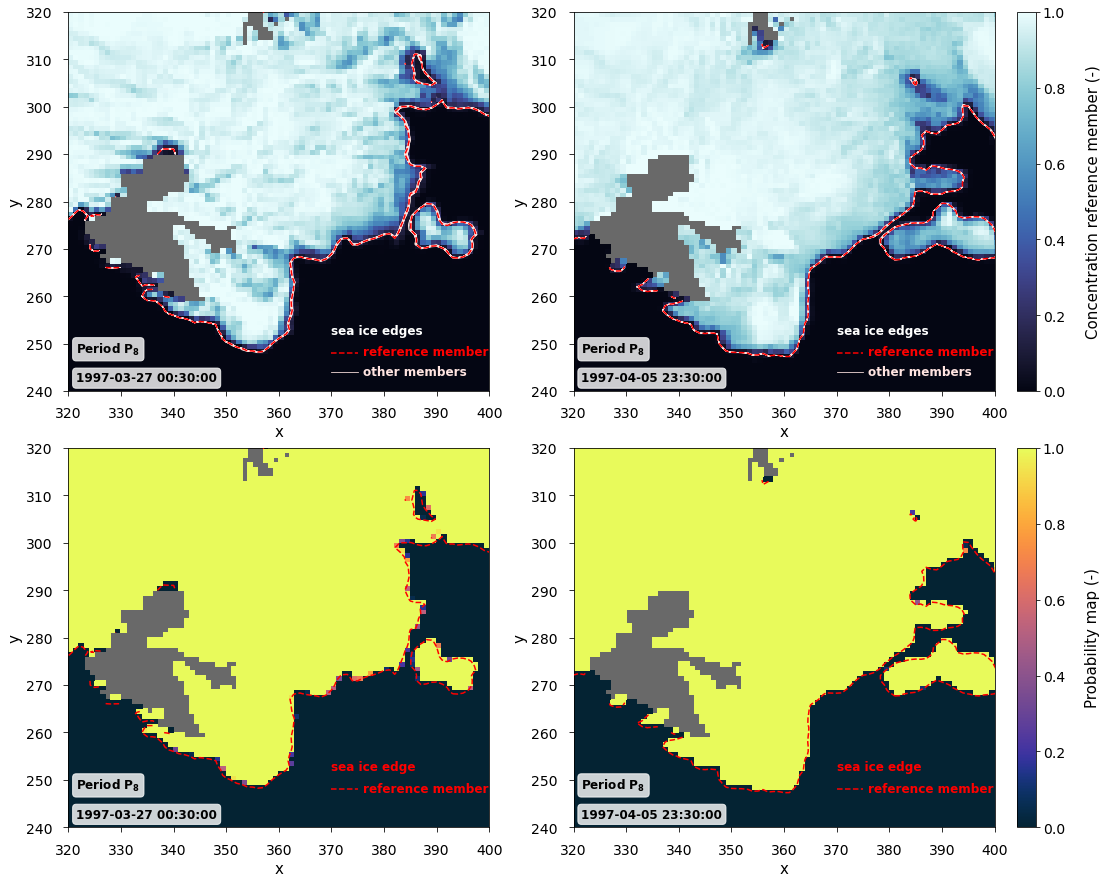

In [15]:
#Figure to illustrate the computation of the SPS

##Choose the member of reference
member_ref=0

##Computation of the probability map
ce=0.15
proba_map=libiceedge.fproba_ce(dat_exp_interest,"siconc",ce,n=member_ref)

#for iperiod in range(len(period_interest)): #iteration over the periods of interest
for iperiod in [7]: #if not all periods interest us

    ##Identifying the beginning and end of the period of interest
    ibegin=iperiod*24*10 ; iend=(iperiod+1)*24*10-1
    print(dat_exp_interest[0].time_counter[ibegin].values,dat_exp_interest[0].time_counter[iend].values)
    it=[ibegin,iend]
    
    ##Creation of the figure
    fig=plt.figure(figsize=(20,15))
    axs=libfig.faxes(4,2,2)
    plt.subplots_adjust(wspace=0.5,hspace=0.15)

    for iax in range(len(axs)): #iteration over the subfigures

        ##Plot the ice edge position for the member of reference
        axs[iax].contour(dat_exp_interest[member_ref].siconc[it[iax%2],:,:].where(dat_masks.tmask[0,0,:,:]>0),levels=[ce],colors=["red"],zorder=5,linestyles="--")
            ##Display some legends
        axs[iax].plot([pos_corner[0]+0.6*width_height[0]+2,pos_corner[0]+0.6*width_height[0]+5+2],\
                      [pos_corner[1]+0.15*width_height[1]-4,pos_corner[1]+0.15*width_height[1]-4],color="red",ls="--",zorder=5)
        axs[iax].text(pos_corner[0]+0.6*width_height[0]+6+2,pos_corner[1]+0.15*width_height[1]-4-0.5,"reference member",zorder=5,color="red",fontweight="bold",fontsize=12)

        
        if iax<2: ##First line: sea ice edge position for all members and concentration of the reference member as background
            
            ##Plot the field of concentration for the reference member
            cf=axs[iax].pcolormesh(dat_exp_interest[member_ref].siconc[it[iax%2],:,:].where(dat_masks.tmask[0,0,:,:]>0),cmap=cm.ice,norm=mcolors.Normalize(vmin=0,vmax=1),zorder=-1)
            
            ##Plot the position of the sea ice edge for all the remaining members
            for imb in range(nb_mber):
                if imb!=member_ref:
                    axs[iax].contour(dat_exp_interest[imb].siconc[it[iax%2],:,:].where(dat_masks.tmask[0,0,:,:]>0),levels=[ce],colors=["mistyrose"],linewidths=0.8,linestyles="-")

            ##Display some legends
            axs[iax].text(pos_corner[0]+0.6*width_height[0]+2,pos_corner[1]+0.15*width_height[1],"sea ice edges",zorder=5,color="white",fontweight="bold",fontsize=12)
            axs[iax].plot([pos_corner[0]+0.6*width_height[0]+2,pos_corner[0]+0.6*width_height[0]+5+2],\
                      [pos_corner[1]+0.15*width_height[1]-8,pos_corner[1]+0.15*width_height[1]-8],color="mistyrose",lw=0.8,zorder=5)
            axs[iax].text(pos_corner[0]+0.6*width_height[0]+6+2,pos_corner[1]+0.15*width_height[1]-8-0.7,"other members",zorder=5,color="mistyrose",fontweight="bold",fontsize=12)
        
        else: #Second line: plot probability maps
            cf2=axs[iax].pcolormesh(proba_map[it[iax%2],:,:].where(dat_masks.tmask[0,0,:,:]>0),cmap=cm.thermal)

            ##Display some legends
            axs[iax].text(pos_corner[0]+0.6*width_height[0]+2,pos_corner[1]+0.15*width_height[1],"sea ice edge",zorder=5,color="red",fontweight="bold",fontsize=12)

        ##Set up the background
        axs[iax].set_facecolor("dimgrey")
        
        ##Set up the axes
        axs[iax].set_xlim(pos_corner[0],pos_corner[0]+width_height[0])
        axs[iax].set_ylim(pos_corner[1],pos_corner[1]+width_height[1])
        axs[iax].tick_params(axis="both",labelsize=14,pad=12)
        axs[iax].set_xlabel("x",fontsize=15) ; axs[iax].set_ylabel("y",fontsize=15)

        for i, tick in enumerate(axs[iax].yaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks
        for i, tick in enumerate(axs[iax].xaxis.get_major_ticks()):
            tick.tick1line.set_markersize(5) #set up the size of the ticks

        ##Display the time
        axs[iax].text(pos_corner[0]+1.5,pos_corner[1]+8,"Period P"+r"$_{\mathbf{"+str(iperiod+1)+"}}$",\
                      size=12,fontweight="bold",bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.8))
        axs[iax].text(pos_corner[0]+1.5,pos_corner[1]+2,dat_exp_interest[member_ref].time_counter.to_index()[it[iax%2]],\
                      size=12,fontweight="bold",bbox=dict(facecolor='white', edgecolor='white', boxstyle='round',alpha=0.8))

    ##Set up the colorbars
    cb=plt.colorbar(cf,ax=[axs[0],axs[1]],ticks=[0.0,0.2,0.4,0.6,0.8,1.0],orientation="vertical",pad=0.02)
    cb.ax.set_ylabel('Concentration reference member (-)',fontsize=15,labelpad=20)
    cb.ax.tick_params(labelsize=14)
    cb2=plt.colorbar(cf2,ax=[axs[2],axs[3]],ticks=[0.0,0.2,0.4,0.6,0.8,1.0],orientation="vertical",pad=0.02)
    cb2.ax.set_ylabel('Probability map (-)',fontsize=15,labelpad=20)
    cb2.ax.tick_params(labelsize=14)

    plt.plot()
    ##Saving the figure
    #fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_SPS_newexp/Illu_fig_SPS_"+exp_interest_solo+"_"+period_interest[iperiod]+".png",\
    #            facecolor="white",edgecolor="none",bbox_inches="tight")